Rowlandson Kariuki

Phase 3 Project 

Part-Time

# SyriaTel Customer Churn 

We will be assisting SyriaTel in determining why customers are churning. We will use the data science process of OSEMN which is obtaining the data, scrubbing the data, exploring it, modeling it, and finally interpreting it. This will allow SyriaTel to recognize their customers who are unsatisfied in leaving and give them an opportunity to explore ways to keep them. This is a binary classisfication since we are determining if a customer stays or leaves SyriaTel.

### Obtain Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modeling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("file:///Users/pc/Downloads/bigml_59c28831336c6604c800002a.csv") # Read a CSV file and store the data in a DataFrame (df)

#### Data Cleaning 

In [3]:
df.info() #creating dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.head() #checking data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.isna().sum() #checking missing values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# We have observed that there are no null values in the dataset. Nonetheless, it's important to note that there are certain categorical columns that will require conversion to numerical format in the future. On the whole, the dataset appears to be in good shape.

In [7]:
df['churn'] = df['churn'].astype(int) # changing categorical data in 'churn' column into integer type
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Exploratory Data

In [8]:
df['churn'].value_counts() #checking the number of churn values

0    2850
1     483
Name: churn, dtype: int64

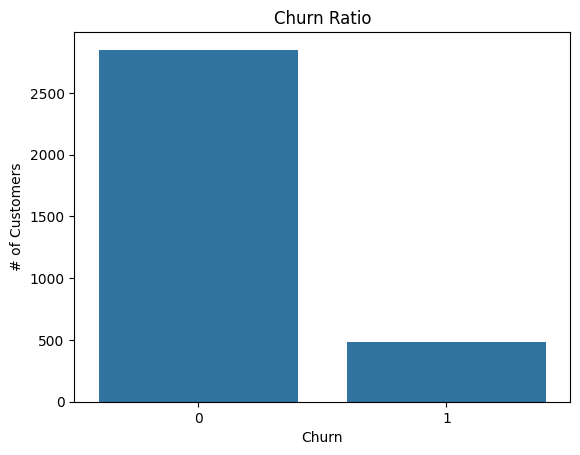

In [9]:
# Create a count plot to visualize the churn ratio
sns.countplot(x='churn', data=df)
# 'x' specifies the data for the x-axis, 'data' is the DataFrame containing the data

# Set the title for the plot
plt.title('Churn Ratio')

# Label the x-axis
plt.xlabel('Churn')
# Label the y-axis
plt.ylabel('# of Customers')

# Save the plot as an image file with the given filename
plt.savefig("Ratio of Churn")


In [10]:
Percent_churn = 483/(2850+483)
print(Percent_churn) #percentage of customers churning

0.14491449144914492


<Axes: xlabel='state'>

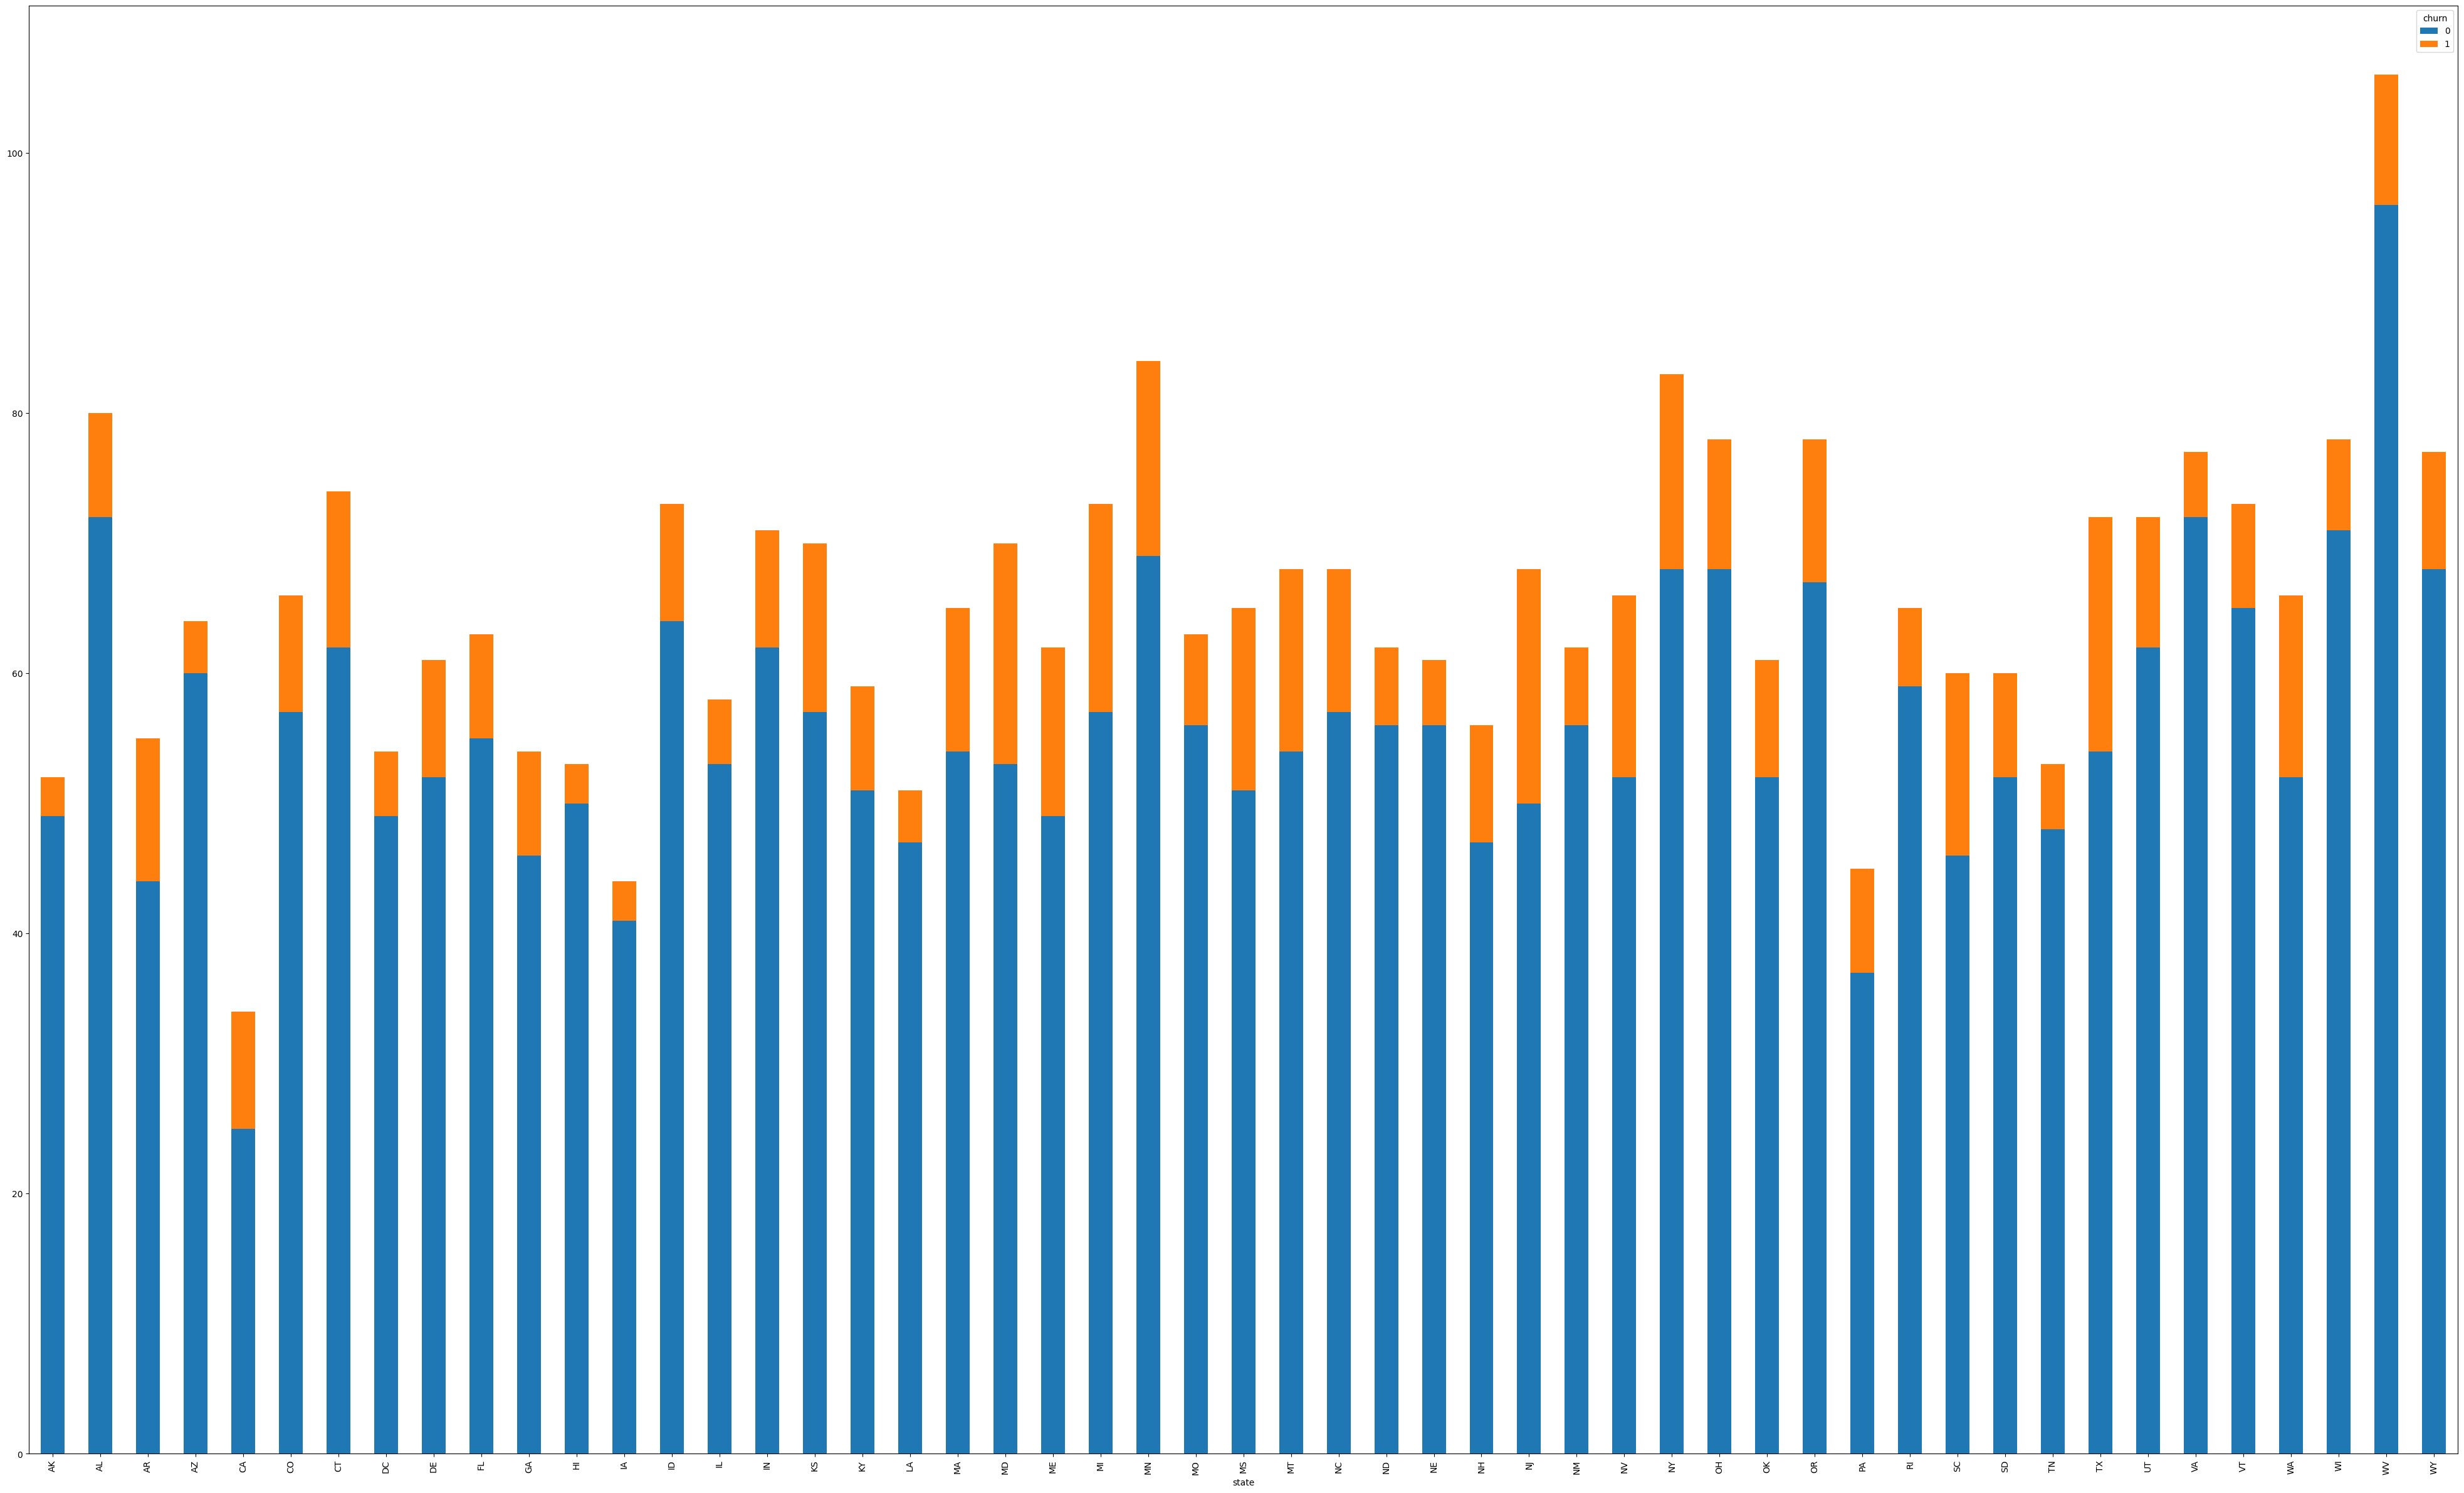

In [11]:
# Group the DataFrame 'df' by two columns: "state" and "churn"
grouped = df.groupby(["state", "churn"])

# Calculate the size (count) of each group and unstack the result
# Unstacking will pivot the data to make it suitable for a stacked bar plot
unstacked = grouped.size().unstack()

# Create a stacked bar plot using the unstacked data
unstacked.plot(kind='bar', stacked=True, figsize=(50, 30))

<Axes: xlabel='count', ylabel='customer service calls'>

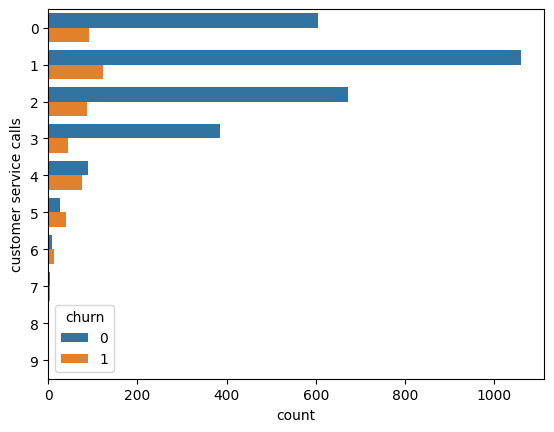

In [12]:
sns.countplot(y='customer service calls', hue='churn', data=df)

State with the minimum amount of calls:
state
CA    10431
Name: all calls, dtype: int64
State with the maximum amount of calls:
state
WV    32055
Name: all calls, dtype: int64


<Axes: ylabel='state'>

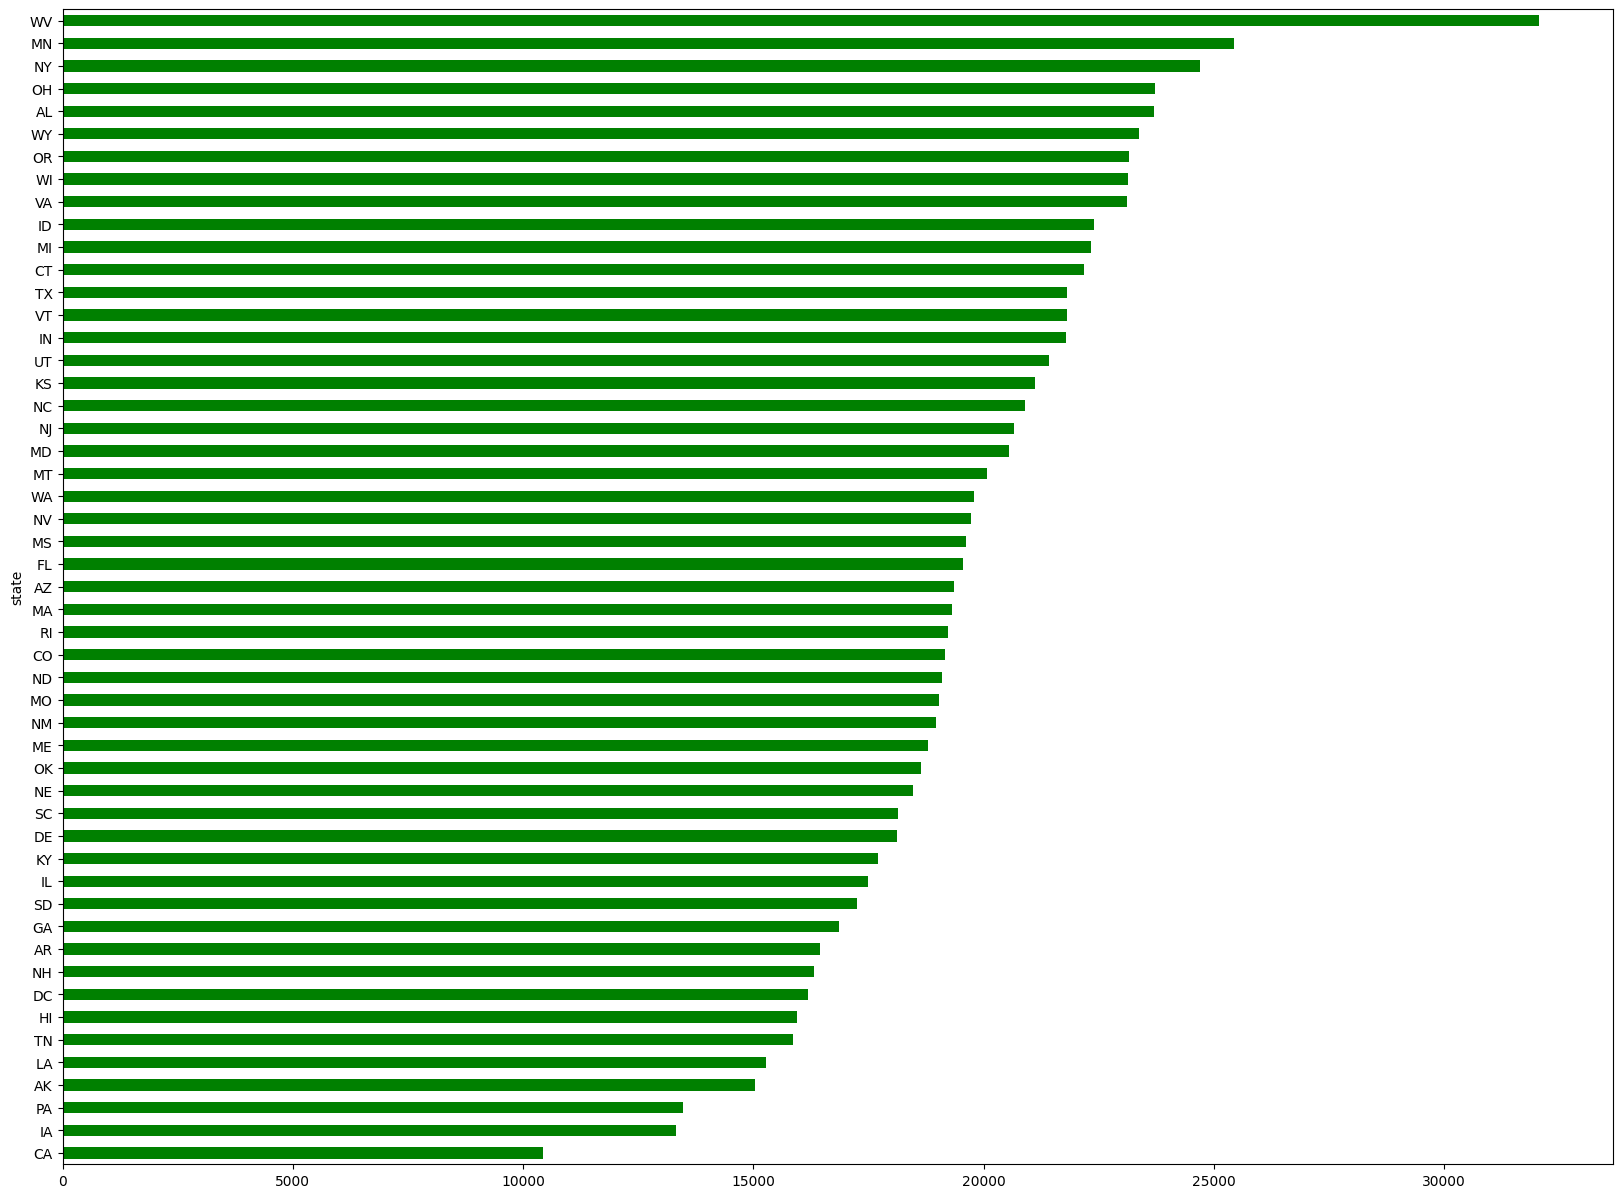

In [13]:
# Create a new column 'all calls' in the DataFrame by summing three call types
df['all calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

# Group the DataFrame by 'state' and calculate the sum of 'all calls' in each state
state_calls = df.groupby('state')['all calls'].sum().sort_values()

# Print the state(s) with the minimum and maximum total calls
print('State with the minimum amount of calls:\n', state_calls[state_calls == state_calls[0]], sep='')
print('State with the maximum amount of calls:\n', state_calls[state_calls == state_calls[-1]], sep='')

# Create a horizontal bar plot to visualize the total calls per state
plt.xlabel('Amount of calls')
plt.ylabel('State')
state_calls.plot(kind='barh', x='Amount of calls', y='State', figsize=(20, 15), colormap='ocean')


<Axes: xlabel='customer service calls', ylabel='count'>

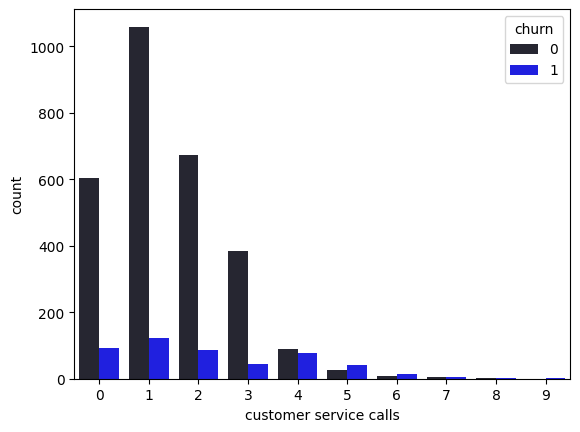

In [14]:
sns.countplot(x='customer service calls', hue='churn', data=df, color = 'blue')

<Axes: xlabel='count', ylabel='total intl calls'>

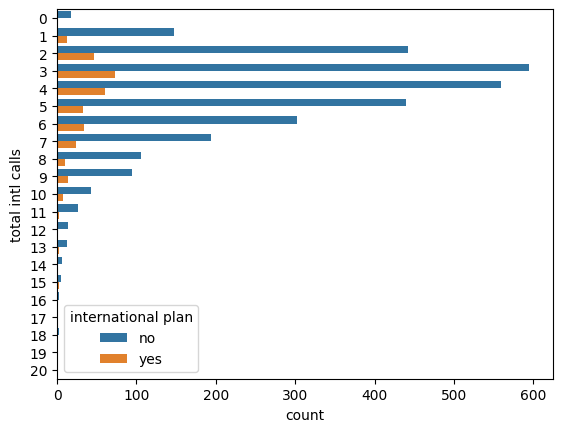

In [15]:
sns.countplot(y='total intl calls', hue='international plan', data=df)

Our exploratory data analysis provides preliminary insights into the dataset. It reveals that there is a class imbalance issue between churned and non-churned customers, with churned customers representing only 14% of the total. During the modeling phase, employing Synthetic Minority Over-sampling Technique (SMOTE) is recommended to address this class imbalance effectively

#### Modeling Preparation

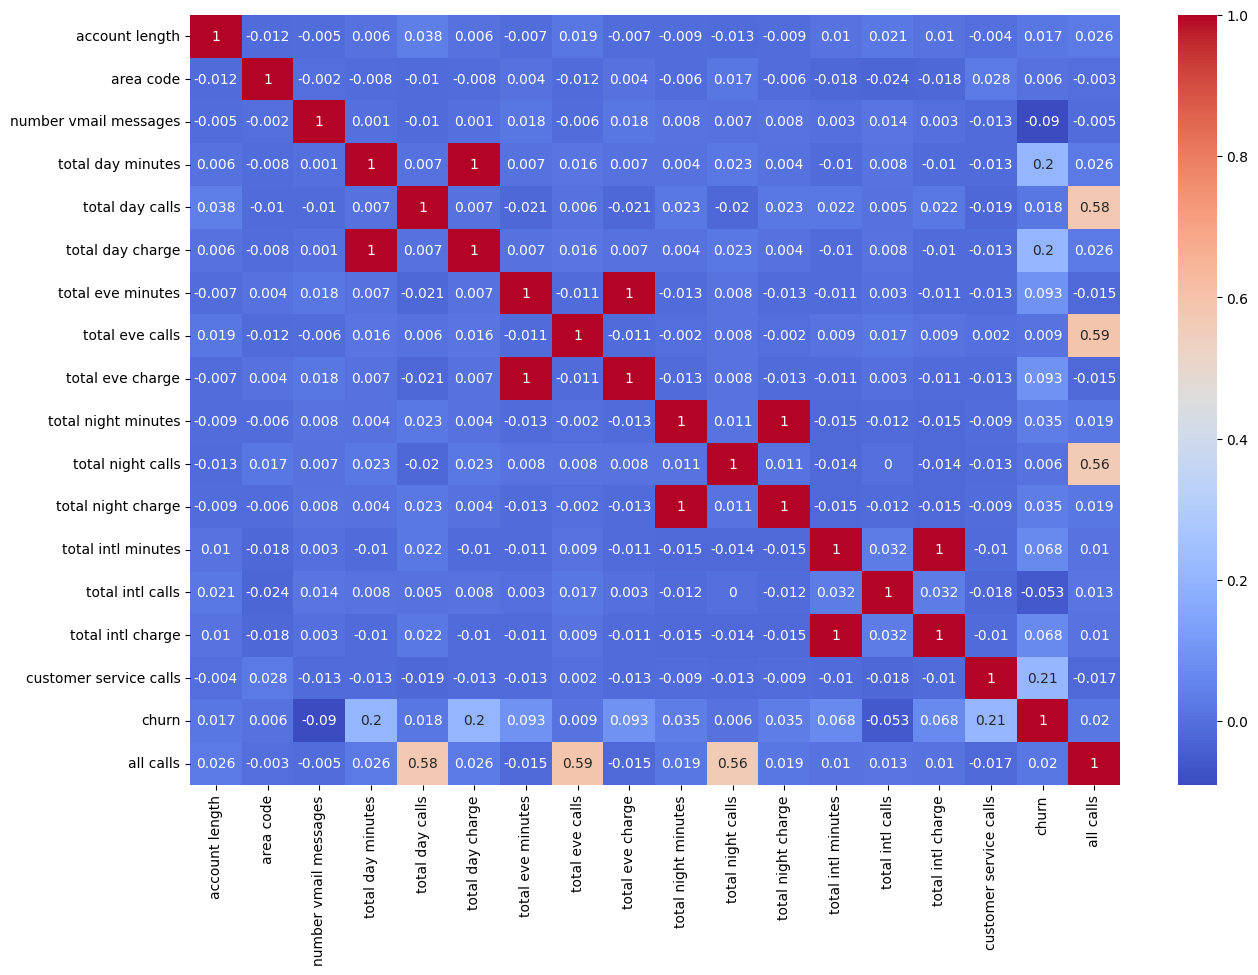

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,all calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.026157
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.003119
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,-0.004925
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.026193
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.577225
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.026195
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,-0.014850
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.588530
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,-0.014839
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,0.018582


In [16]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()
df.corr()
#correlation analysis

The features that have good correlation with churn are total day charge, customer service calls, total day charge/day plan. We will find out more using machine learning methods.

In [17]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
all calls                   int64
dtype: object

In [18]:
corr_matrix = df.corr()
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
all calls                 0.019651
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

Customer service calls, total day minutes, total day charge are the features most correlated with churn. Our model will give us more insight regarding this.

In [19]:
df = df.drop(['area code', 'state', 'phone number'], axis=1) 
#these features are causing noise 
#I don't think they are necessary so i will drop them

In [20]:
#making sure those values are dropped
df.head() 

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,all calls
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,300
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,329
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,328
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,248
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,356


In [21]:
#Dealing with spaces between column names
df.columns = [c.replace(' ', '_') for c in df.columns]

In [22]:
print(df["international_plan"].unique())
print(df["voice_mail_plan"].unique())
print(df["customer_service_calls"].unique())

['no' 'yes']
['yes' 'no']
[1 0 2 3 4 5 7 9 6 8]


In [23]:
#changing boolean to int
df['total_day_minutes'] = df['total_day_minutes'].astype(int)
df['total_day_charge'] = df['total_day_charge'].astype(int)
df['total_eve_minutes'] = df['total_eve_minutes'].astype(int)
df['total_eve_charge'] = df['total_eve_charge'].astype(int)
df['total_night_minutes'] = df['total_night_minutes'].astype(int)
df['total_night_charge'] = df['total_night_charge'].astype(int)
df['total_intl_minutes'] = df['total_intl_minutes'].astype(int)
df['total_intl_charge'] = df['total_intl_charge'].astype(int)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   account_length          3333 non-null   int64 
 1   international_plan      3333 non-null   object
 2   voice_mail_plan         3333 non-null   object
 3   number_vmail_messages   3333 non-null   int64 
 4   total_day_minutes       3333 non-null   int32 
 5   total_day_calls         3333 non-null   int64 
 6   total_day_charge        3333 non-null   int32 
 7   total_eve_minutes       3333 non-null   int32 
 8   total_eve_calls         3333 non-null   int64 
 9   total_eve_charge        3333 non-null   int32 
 10  total_night_minutes     3333 non-null   int32 
 11  total_night_calls       3333 non-null   int64 
 12  total_night_charge      3333 non-null   int32 
 13  total_intl_minutes      3333 non-null   int32 
 14  total_intl_calls        3333 non-null   int64 
 15  tota

In [25]:
#encoding churn to 0/1
labelencoder = LabelEncoder()
df['churn'] = labelencoder.fit_transform(df['churn'])

In [26]:
#dropping target variable
X = df.drop(columns= 'churn', axis=1)
y = df['churn']

In [27]:
#dummying variables(subgrouping)
X
X = pd.get_dummies(X)
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,all_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265,110,45,197,99,16,244,91,11,10,3,2,1,300,1,0,0,1
1,107,26,161,123,27,195,103,16,254,103,11,13,3,3,1,329,1,0,0,1
2,137,0,243,114,41,121,110,10,162,104,7,12,5,3,0,328,1,0,1,0
3,84,0,299,71,50,61,88,5,196,89,8,6,7,1,2,248,0,1,1,0
4,75,0,166,113,28,148,122,12,186,121,8,10,3,2,3,356,0,1,1,0


In [28]:
#looking over columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   account_length          3333 non-null   int64
 1   number_vmail_messages   3333 non-null   int64
 2   total_day_minutes       3333 non-null   int32
 3   total_day_calls         3333 non-null   int64
 4   total_day_charge        3333 non-null   int32
 5   total_eve_minutes       3333 non-null   int32
 6   total_eve_calls         3333 non-null   int64
 7   total_eve_charge        3333 non-null   int32
 8   total_night_minutes     3333 non-null   int32
 9   total_night_calls       3333 non-null   int64
 10  total_night_charge      3333 non-null   int32
 11  total_intl_minutes      3333 non-null   int32
 12  total_intl_calls        3333 non-null   int64
 13  total_intl_charge       3333 non-null   int32
 14  customer_service_calls  3333 non-null   int64
 15  all_calls            

In [29]:
#test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Dummy Classifier: using this for my baseline accuracy. It would tell us that we are correct in predicting churn and no churn, and we will use it to compare the future models.

In [30]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
baseline_acc = round(dummy.score(X_test, y_test), 2) * 100
print('Baseline Accuracy: {0}%'.format(baseline_acc))

Baseline Accuracy: 85.0%


#### Model 1: Logistic Regression

In [31]:
#creating a pipeline with scaling, smote, and the lr model
lr = LogisticRegression()
LR = Pipeline([('standardscaler', StandardScaler()), ('smote', SMOTE()), ('lr', LogisticRegression())])
#fitting the model
LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('lr', LogisticRegression())])

In [32]:
#checking accuracy
LR.score(X_test, y_test)

0.7841079460269865

In [33]:
#estimating how well our unseen data is
cross_val_score(LR, X, y)

array([0.74062969, 0.76161919, 0.7856072 , 0.75225225, 0.77327327])

In [35]:
#making predictions 
LR_Pred = LR.predict(X_test)

In [36]:
print(classification_report(y_test, LR_Pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.76      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.86      0.78      0.81       667



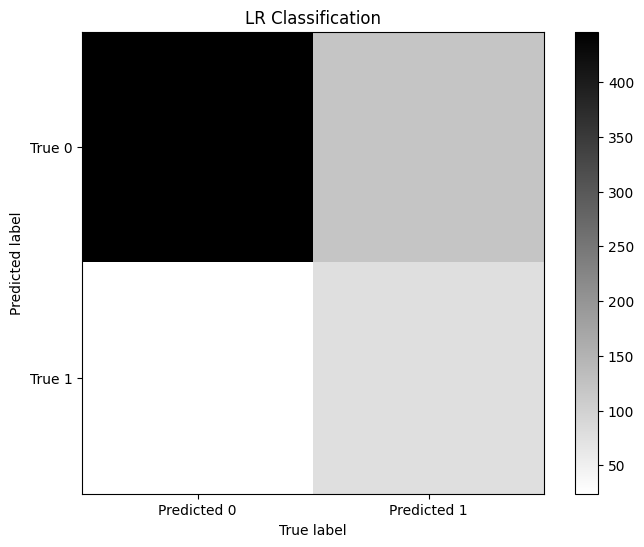

In [41]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, LR_Pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap='binary')
plt.title('LR Classification')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

Our logistic regression model was 78% accurate in identifying the true positives(recall) which is about 76%.

#### Model 2- KNN

In [42]:
#creating knn classifier

knn = KNeighborsClassifier()

In [43]:
#creating pipeline with scaler, smote, 
KNN = Pipeline([('standardscaler', StandardScaler()), ('smote', SMOTE()), ('knn', KNeighborsClassifier())])

In [48]:
#fitting train data
KNN.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('knn', KNeighborsClassifier())])

In [49]:
#creating predictions
KNN_Pred = KNN.predict(X_test)

In [42]:
print(classification_report(y_test, KNN_Pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       566
           1       0.46      0.74      0.57       101

    accuracy                           0.83       667
   macro avg       0.70      0.79      0.73       667
weighted avg       0.87      0.83      0.84       667



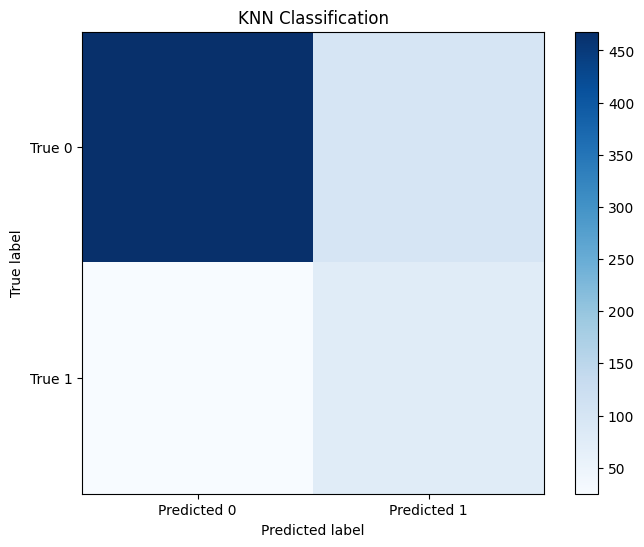

In [51]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, KNN_Pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap='Blues')
plt.title('KNN Classification')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

The KNN model was 80% accurate in identifying the true positives (recall) of 81%.

#### Model 3- Random Forest

In [52]:
#assigning classifier
rfc = RandomForestClassifier()

In [53]:
#creating pipeline with scaler, smote, classifier
RFC = Pipeline([('standardscaler', StandardScaler()), ('smote', SMOTE()), ('rfc', RandomForestClassifier())])

In [54]:
#fitting training data
RFC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('rfc', RandomForestClassifier())])

In [55]:
#viewing cross validation score
cross_val_score(RFC, X, y)

array([0.94152924, 0.94302849, 0.95352324, 0.94894895, 0.95795796])

In [56]:
#making predictions
RFC_Pred = RFC.predict(X_test)

In [57]:
#looking at classification report
print(classification_report(y_test, RFC_Pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       566
           1       0.87      0.80      0.84       101

    accuracy                           0.95       667
   macro avg       0.92      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667



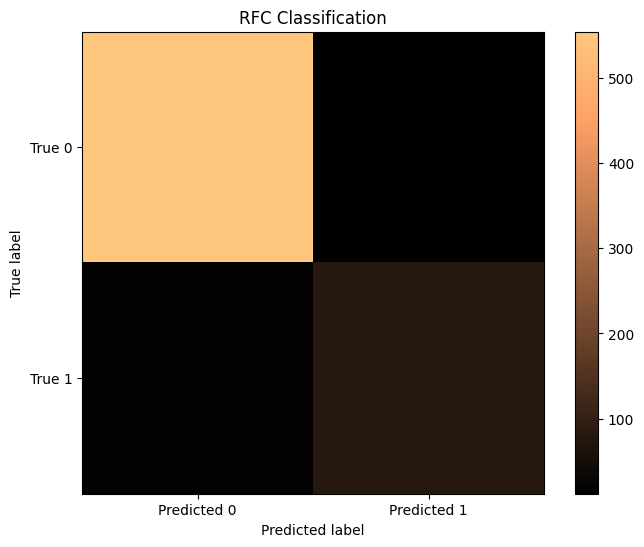

In [59]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, RFC_Pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap='copper')
plt.title('RFC Classification')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Our random forest model was 95% accurate in identifying our true postives (recall) of 82%

#### Final Best Model: Random Forest

In [60]:
#creating the best model
bestmodel = RandomForestClassifier(criterion='gini') 
bestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
#looking at feature importance
bestmodel.feature_importances_

array([0.03443137, 0.02672324, 0.14444794, 0.03651046, 0.11194301,
       0.07146562, 0.03299933, 0.05167826, 0.04038879, 0.0353216 ,
       0.02378803, 0.04917242, 0.05374107, 0.01456596, 0.12516298,
       0.03576364, 0.04329651, 0.04240543, 0.01371425, 0.0124801 ])

In [62]:
#using pearson coeff for correlation
bm = pd.DataFrame({'Features':X.columns, 'coeff':bestmodel.feature_importances_})

In [63]:
#ranking coeff
final_model = bm.sort_values(by='coeff', ascending=False)

<BarContainer object of 10 artists>

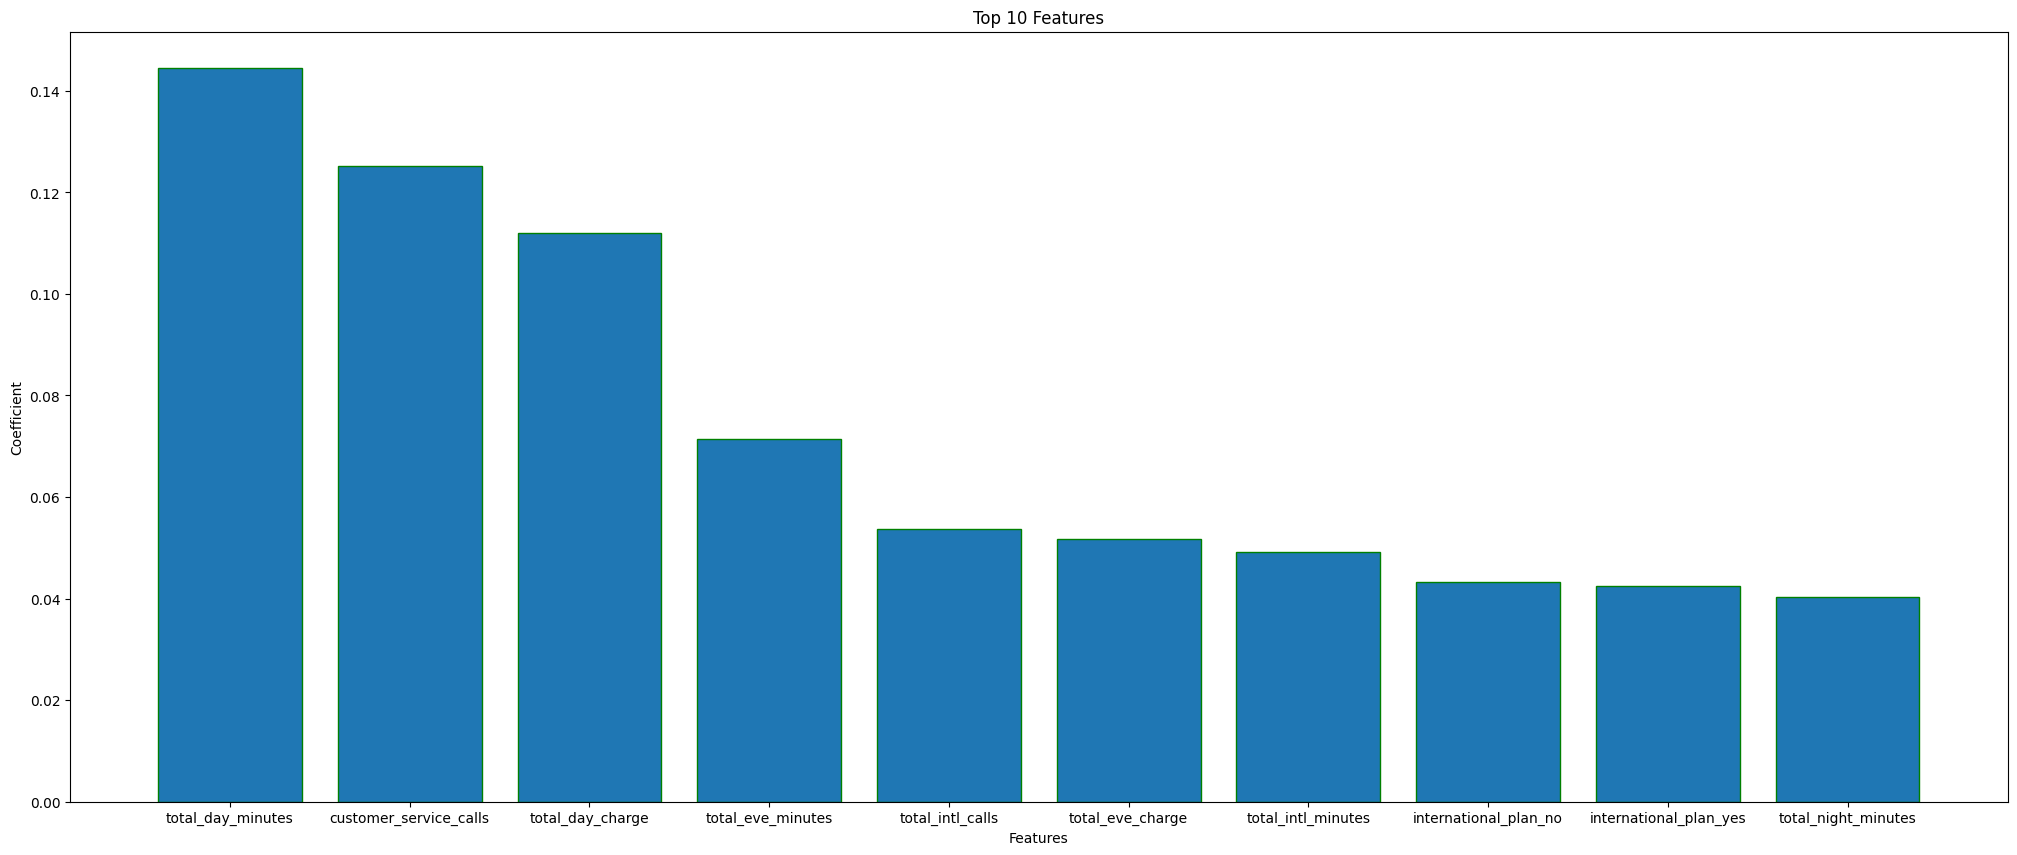

In [64]:
fm1 = final_model.head(10)
plt.figure(figsize=(25,10))
plt.title('Top 10 Features')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.bar(fm1['Features'], fm1['coeff'], edgecolor='green')

In [65]:
finalmodeldf = df

In [66]:
finalmodeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   account_length          3333 non-null   int64 
 1   international_plan      3333 non-null   object
 2   voice_mail_plan         3333 non-null   object
 3   number_vmail_messages   3333 non-null   int64 
 4   total_day_minutes       3333 non-null   int32 
 5   total_day_calls         3333 non-null   int64 
 6   total_day_charge        3333 non-null   int32 
 7   total_eve_minutes       3333 non-null   int32 
 8   total_eve_calls         3333 non-null   int64 
 9   total_eve_charge        3333 non-null   int32 
 10  total_night_minutes     3333 non-null   int32 
 11  total_night_calls       3333 non-null   int64 
 12  total_night_charge      3333 non-null   int32 
 13  total_intl_minutes      3333 non-null   int32 
 14  total_intl_calls        3333 non-null   int64 
 15  tota

In [67]:
#chaging target to num variable
labelencoder = LabelEncoder()
finalmodeldf['churn'] = labelencoder.fit_transform(finalmodeldf['churn'])

#create and set features
X = finalmodeldf.drop(columns= 'churn', axis=1)
y = df['churn']

#creating dummies for categorical variables
X = pd.get_dummies(X)
X.head()

#checking the columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   account_length          3333 non-null   int64
 1   number_vmail_messages   3333 non-null   int64
 2   total_day_minutes       3333 non-null   int32
 3   total_day_calls         3333 non-null   int64
 4   total_day_charge        3333 non-null   int32
 5   total_eve_minutes       3333 non-null   int32
 6   total_eve_calls         3333 non-null   int64
 7   total_eve_charge        3333 non-null   int32
 8   total_night_minutes     3333 non-null   int32
 9   total_night_calls       3333 non-null   int64
 10  total_night_charge      3333 non-null   int32
 11  total_intl_minutes      3333 non-null   int32
 12  total_intl_calls        3333 non-null   int64
 13  total_intl_charge       3333 non-null   int32
 14  customer_service_calls  3333 non-null   int64
 15  all_calls            

In [68]:
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# assigning classifier
rfc = RandomForestClassifier(random_state=101)

#applying parameters
params = {
    'max_features': [1, 'sqrt', 'log2'],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['entropy', 'gini']
}

#gridsearch for hyperparameter tuning
grid = GridSearchCV(estimator= rfc, param_grid=params, verbose=1)

In [71]:
#fitting train data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_features': [1, 'sqrt', 'log2']},
             verbose=1)

In [72]:
#finding best paramaters
rf_best = grid.best_estimator_

In [73]:
#checking cross validation score
cross_val_score(rf_best, X, y, scoring='f1_micro')

array([0.94902549, 0.94602699, 0.96401799, 0.94894895, 0.95645646])

In [74]:
#classification report
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.93      0.70      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.94       667



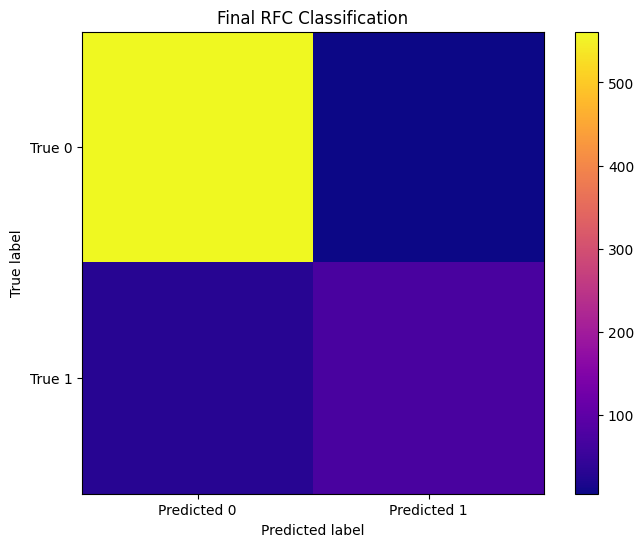

In [76]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, rf_best.predict(X_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap='plasma')
plt.title('Final RFC Classification')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Following hyperparameter tuning, the overall accuracy of our model remained unchanged. However, we observed a few key changes in our model's performance:

Higher Precision: Precision increased after hyperparameter tuning. This means that, of the instances our model identified as positive (churn), a higher proportion of them were indeed true positives. In other words, when the model predicted that a customer would churn, it was more likely to be correct. This can be seen as an improvement in the model's ability to make accurate positive predictions.

Lower Recall: Recall, on the other hand, decreased. This suggests that our model correctly identified fewer true positives after tuning. In other words, it became less sensitive in capturing all actual instances of churn. This can be seen as a trade-off where the model may miss some customers who actually churned, but the ones it predicts as churn are more likely to be correct (higher precision).

The balance between precision and recall is often a trade-off. Increasing precision may lead to a decrease in recall and vice versa. The choice of whether to prioritize precision or recall depends on the specific goals of your model and the consequences of false positives and false negatives.

In summary, while the overall accuracy remained the same, the model's ability to make accurate positive predictions (precision) improved after hyperparameter tuning. However, this came at the cost of capturing fewer true positives (lower recall). It's essential to consider the specific business context and objectives when deciding which metric to prioritize and fine-tuning the model accordingly.






### Findings/Conclusion

The Random Forest Classifier initially achieved an accuracy of 95% when classifying customer churn. This means that it correctly predicted 95% of the cases. Additionally, it had a recall rate of 82%, indicating that it accurately identified true positive cases 82% of the time. Recall is especially important when dealing with imbalanced datasets, as it helps capture positive cases effectively.

After implementing hyperparameter tuning, the accuracy remained at 95%, which is impressive. However, there were some trade-offs. The precision increased, indicating that the model reduced false positives, which can be important in some scenarios. On the flip side, the recall decreased slightly. This means the model started missing a few more positive cases compared to the initial model.

The F1 scores for both the original Random Forest model and the final one were close, with the original model at 0.82 and the final model at 0.80. The F1 score is a balanced metric between precision and recall. A decrease from 0.82 to 0.80 suggests a slight trade-off between precision and recall.

Cross-validation was performed, and it showed a consistent accuracy of about 95%. This indicates that the model generalizes well to unseen data and avoids overfitting.

Overall, there was a 10% increase in accuracy from the baseline model to the final model, which is a significant improvement and demonstrates the effectiveness of the hyperparameter tuning and model refinement. However, this improvement came at the cost of a slight decrease in recall, which should be considered depending on the specific goals and requirements of the classification task.







The analysis suggests that "Total day minutes," "Total day charge," and the number of "Customer service calls" are the primary factors contributing to customer churn for SyriaTel. Based on these findings, here are some recommendations for SyriaTel to reduce customer churn:

Tailored Plans for High-Usage Customers: Develop and offer plans that are better suited for customers who make more calls or use their phones extensively. This could include unlimited calling and data plans, which might be more cost-effective for these customers. By offering plans that align with their needs, you can retain high-usage customers.

Address Customer Service Issues: The number of "Customer service calls" is a significant factor in churn. This suggests that customers are reaching out to customer service for problem resolution or inquiries. To reduce churn, focus on improving the customer service experience. This can be achieved by:

Training Customer Service Staff: Invest in training for customer service representatives to enhance their problem-solving and communication skills. Ensure that they can effectively address customer issues and inquiries, reducing the need for repeat calls.

Implement Self-Service Options: Provide self-service options through a website or app, allowing customers to find answers to common queries or troubleshoot issues independently. This can reduce the need for customers to contact customer service.

Feedback Mechanisms: Create feedback mechanisms that encourage customers to provide input on their customer service experience. Use this feedback to continuously improve service quality.

Regularly Review and Update Plans: The telecommunications industry is highly competitive and dynamic. Regularly assess and update your service plans to ensure they remain competitive and meet evolving customer needs. Offering flexibility and customization options can be an attractive feature for customers.

By implementing these recommendations, SyriaTel can work towards reducing customer churn and improving overall customer satisfaction. It's important to continuously monitor and adapt strategies based on customer feedback and market dynamics to stay competitive in the industry.